![](https://www.domsoria.com/wp-content/uploads/2019/11/keras.png)

# Convolutional Neural Networks

One of the most exciting areas of deep learning is for sure _computer vision_. This is based on __Convolutional Neural Networks__.


#### Big Data problem
Computer vision is a big data problem. Indeed, dealing with images makes the number of features exploding.

For instance, consider a $1000 \times 1000$ pixels colourful image. 
The number of features is then
$$1000 \times 1000 \times 3 \sim 10^6$$
And for a $1000$ hidden units layer, the number of weights for the first layer is $\sim 10^9$. 
Hence, just for the first layer we have a billion of weights to train.

### CNN layers ###

* **Convolutional neural networks**
* Are the best tool for image prediction and actually by far the largest success of NN
* Quite complex object and data demanding

**What is the convolution?**

![title](images/conv.png)

*  convolution is a mathematical operation on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other.

![title](images/fgge.png)

**Convolutional pass on an image**

* a matrix transformation on each element

![title](images/convExample.png)

![](https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

and an explicit example

![](https://media2.giphy.com/media/i4NjAwytgIRDW/200.gif)

* max pooling (or average pooling)

![title](images/mpool.png)

every portion of the matrix is averages (or max) by elements: helps transforming an image with large size to an image of smaller size
    
    1024 --> 512 --> 256 pixels

## Edge Detection

Consider a gray scale image (for simplicity), thus for example $X = 1000 \times 1000 \times 1$.

Concretely let's take a very simple image

![](images/VerticalEdge.jpg)



**Question**

> Find the matrix form of such image, knowing a black pixel has value 0, and a white one has value 100.

**Answer**

$$\begin{pmatrix} 100 & \ldots & 100 & 0 & \ldots & 0 \\
\vdots  &  \ddots &  \vdots & \vdots  & \ddots &  \vdots \\
100 & \ldots & 100 & 0 & \ldots & 0 \\
\end{pmatrix}$$


A simple exercise to show how by a simple convolutional __filter__ (or __kernel__) one can implement an edge detector.

The __edge detector kernel__ is made by the following $3 \times 3$ matrix

$$\begin{pmatrix} 1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{pmatrix}$$


![](https://miro.medium.com/max/1920/1*D6iRfzDkz-sEzyjYoVZ73w.gif)

**Excercise**

Compute the convolution 

$$\begin{pmatrix} 100 & 100 & 100 & 100 & 0 & 0 & 0 & 0  \\
100 & 100 & 100 & 100 & 0 & 0 & 0 & 0 \\
100 & 100 & 100 & 100 & 0 & 0 & 0 & 0 \\
100 & 100 & 100 & 100 & 0 & 0 & 0 & 0 \\
\end{pmatrix} \star \begin{pmatrix} 1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{pmatrix}$$

# Convolutional Neural Network

We will build a Convolutional deep network, and study how this can be useful to work with images and computer vision tasks.

**After this lecture you will be able to:**
- Build and apply a deep convolutional neural network to supervised learning.

Let's get started!

In [1]:
# Import libraries
import time
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from utils.dnn_app_utils_v3 import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from keras import layers
from keras.layers import Input, Add, Dense, Activation, Dropout
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.optimizers import Adam
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from utils.resnets_utils import *
from keras.initializers import glorot_uniform
from keras.regularizers import l2
import scipy.misc
from matplotlib.pyplot import imshow

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import skimage
import imageio

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Using TensorFlow backend.


# Convolution

### SIGNS Dataset

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>

The following cell loads the dataset.

In [2]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Change the index below and run the cell to visualize some examples in the dataset.

y = 5


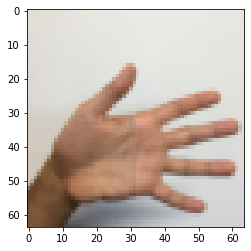

In [3]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

As you can see we have a set of hand signs indicating numbers.

#### Some preprocessing

In [4]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 12288)
Y_train shape: (1080, 6)
X_test shape: (120, 12288)
Y_test shape: (120, 6)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. Please make sure all these shapes make sense to you before continuing.

**Our goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, you are going to build a Keras model that is almost the same as one you have previously built for cat recognition (but now using a softmax output). It is a great occasion to think about how we structure Deep network projects. 

**The model** is a convolutional model *DENSE -> RELU -> DROPOUT(0.2) -> DENSE -> RELU -> DROPOUT(0.2) -> DENSE -> RELU -> DROPOUT(0.5) -> DENSE -> RELU -> DROPOUT(0.5) -> DENSE -> RELU -> DROPOUT(0.5) -> DENSE -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### The Dataset


In [2]:
# generate 2d classification dataset
X, Y = make_moons(n_samples=150, noise=0.2, random_state=42)

X_train, X_test, Y_train_orig, Y_test_orig = train_test_split(X, Y, test_size=0.2)

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 2).T
Y_test = convert_to_one_hot(Y_test_orig, 2).T

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 120
number of test examples = 30
X_train shape: (120, 2)
Y_train shape: (120, 2)
X_test shape: (30, 2)
Y_test shape: (30, 2)


Just for sake of clariness, let's plot our dataset

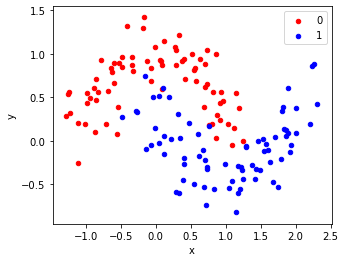

In [3]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

Notice how the dataset cannot be separated by a line, so a Neural Network, being highly non linear may be what we need for this task.

## The model

In [4]:
# model building
n_x = X_train.shape[1] # number of features
model = Sequential()
model.add(Dense(1024, input_dim = n_x, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3072      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 528,898
Trainable params: 528,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
history = model.fit(X_train, Y_train, epochs=2000, validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/2000
84/84 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.5655 - val_loss: 0.6831 - val_accuracy: 0.5417
Epoch 2/2000
84/84 [==============================] - 0s 317us/step - loss: 0.6748 - accuracy: 0.6429 - val_loss: 0.6656 - val_accuracy: 0.6667
Epoch 3/2000
84/84 [==============================] - 0s 219us/step - loss: 0.6575 - accuracy: 0.7738 - val_loss: 0.6492 - val_accuracy: 0.7500
Epoch 4/2000
84/84 [==============================] - 0s 211us/step - loss: 0.6395 - accuracy: 0.7738 - val_loss: 0.6333 - val_accuracy: 0.7639
Epoch 5/2000
84/84 [==============================] - 0s 200us/step - loss: 0.6221 - accuracy: 0.7857 - val_loss: 0.6184 - val_accuracy: 0.7917
Epoch 6/2000
84/84 [==============================] - 0s 205us/step - loss: 0.6066 - accuracy: 0.8036 - val_loss: 0.6037 - val_accuracy: 0.8194
Epoch 7/2000
84/84 [==============================] - 0s 215us/step - loss: 0.5924 - accuracy:

84/84 [==============================] - 0s 290us/step - loss: 0.2712 - accuracy: 0.8690 - val_loss: 0.2565 - val_accuracy: 0.8889
Epoch 114/2000
84/84 [==============================] - 0s 510us/step - loss: 0.2705 - accuracy: 0.8690 - val_loss: 0.2562 - val_accuracy: 0.8889
Epoch 115/2000
84/84 [==============================] - 0s 465us/step - loss: 0.2702 - accuracy: 0.8690 - val_loss: 0.2561 - val_accuracy: 0.8889
Epoch 116/2000
84/84 [==============================] - 0s 315us/step - loss: 0.2696 - accuracy: 0.8690 - val_loss: 0.2558 - val_accuracy: 0.8889
Epoch 117/2000
84/84 [==============================] - 0s 393us/step - loss: 0.2691 - accuracy: 0.8690 - val_loss: 0.2555 - val_accuracy: 0.8889
Epoch 118/2000
84/84 [==============================] - 0s 488us/step - loss: 0.2689 - accuracy: 0.8810 - val_loss: 0.2550 - val_accuracy: 0.8889
Epoch 119/2000
84/84 [==============================] - 0s 410us/step - loss: 0.2684 - accuracy: 0.8810 - val_loss: 0.2549 - val_accuracy: 

84/84 [==============================] - 0s 241us/step - loss: 0.1923 - accuracy: 0.9048 - val_loss: 0.2471 - val_accuracy: 0.8611
Epoch 226/2000
84/84 [==============================] - 0s 266us/step - loss: 0.1908 - accuracy: 0.9048 - val_loss: 0.2464 - val_accuracy: 0.8611
Epoch 227/2000
84/84 [==============================] - 0s 318us/step - loss: 0.1895 - accuracy: 0.9048 - val_loss: 0.2454 - val_accuracy: 0.8889
Epoch 228/2000
84/84 [==============================] - 0s 296us/step - loss: 0.1886 - accuracy: 0.9048 - val_loss: 0.2454 - val_accuracy: 0.8889
Epoch 229/2000
84/84 [==============================] - 0s 503us/step - loss: 0.1869 - accuracy: 0.9048 - val_loss: 0.2440 - val_accuracy: 0.8889
Epoch 230/2000
84/84 [==============================] - 0s 491us/step - loss: 0.1859 - accuracy: 0.9048 - val_loss: 0.2425 - val_accuracy: 0.8889
Epoch 231/2000
84/84 [==============================] - 0s 454us/step - loss: 0.1846 - accuracy: 0.9048 - val_loss: 0.2415 - val_accuracy: 

84/84 [==============================] - 0s 293us/step - loss: 0.0954 - accuracy: 0.9881 - val_loss: 0.1548 - val_accuracy: 0.9167
Epoch 338/2000
84/84 [==============================] - 0s 278us/step - loss: 0.0950 - accuracy: 0.9762 - val_loss: 0.1546 - val_accuracy: 0.9167
Epoch 339/2000
84/84 [==============================] - 0s 282us/step - loss: 0.0945 - accuracy: 0.9762 - val_loss: 0.1537 - val_accuracy: 0.9167
Epoch 340/2000
84/84 [==============================] - 0s 295us/step - loss: 0.0936 - accuracy: 0.9762 - val_loss: 0.1540 - val_accuracy: 0.9306
Epoch 341/2000
84/84 [==============================] - 0s 296us/step - loss: 0.0933 - accuracy: 0.9762 - val_loss: 0.1538 - val_accuracy: 0.9306
Epoch 342/2000
84/84 [==============================] - 0s 242us/step - loss: 0.0928 - accuracy: 0.9762 - val_loss: 0.1536 - val_accuracy: 0.9167
Epoch 343/2000
84/84 [==============================] - 0s 291us/step - loss: 0.0923 - accuracy: 0.9762 - val_loss: 0.1544 - val_accuracy: 

84/84 [==============================] - 0s 349us/step - loss: 0.0543 - accuracy: 0.9881 - val_loss: 0.1387 - val_accuracy: 0.8889
Epoch 450/2000
84/84 [==============================] - 0s 374us/step - loss: 0.0542 - accuracy: 0.9881 - val_loss: 0.1397 - val_accuracy: 0.8889
Epoch 451/2000
84/84 [==============================] - 0s 343us/step - loss: 0.0543 - accuracy: 0.9881 - val_loss: 0.1409 - val_accuracy: 0.8889
Epoch 452/2000
84/84 [==============================] - 0s 351us/step - loss: 0.0535 - accuracy: 0.9881 - val_loss: 0.1418 - val_accuracy: 0.8889
Epoch 453/2000
84/84 [==============================] - 0s 334us/step - loss: 0.0533 - accuracy: 0.9881 - val_loss: 0.1432 - val_accuracy: 0.8889
Epoch 454/2000
84/84 [==============================] - 0s 317us/step - loss: 0.0531 - accuracy: 0.9881 - val_loss: 0.1442 - val_accuracy: 0.8889
Epoch 455/2000
84/84 [==============================] - 0s 329us/step - loss: 0.0528 - accuracy: 0.9881 - val_loss: 0.1436 - val_accuracy: 

84/84 [==============================] - 0s 282us/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 0.8889
Epoch 562/2000
84/84 [==============================] - 0s 343us/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.1668 - val_accuracy: 0.8889
Epoch 563/2000
84/84 [==============================] - 0s 293us/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.1677 - val_accuracy: 0.8889
Epoch 564/2000
84/84 [==============================] - 0s 392us/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.1682 - val_accuracy: 0.8889
Epoch 565/2000
84/84 [==============================] - 0s 251us/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.1686 - val_accuracy: 0.8889
Epoch 566/2000
84/84 [==============================] - 0s 252us/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.1688 - val_accuracy: 0.8889
Epoch 567/2000
84/84 [==============================] - 0s 223us/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.1701 - val_accuracy: 

84/84 [==============================] - 0s 279us/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.2128 - val_accuracy: 0.9167
Epoch 674/2000
84/84 [==============================] - 0s 260us/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.2139 - val_accuracy: 0.9167
Epoch 675/2000
84/84 [==============================] - 0s 254us/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.2145 - val_accuracy: 0.9167
Epoch 676/2000
84/84 [==============================] - 0s 272us/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.2130 - val_accuracy: 0.9167
Epoch 677/2000
84/84 [==============================] - 0s 278us/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.2132 - val_accuracy: 0.9167
Epoch 678/2000
84/84 [==============================] - 0s 245us/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.2130 - val_accuracy: 0.9028
Epoch 679/2000
84/84 [==============================] - 0s 281us/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.2128 - val_accuracy: 

84/84 [==============================] - 0s 371us/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 0.9167
Epoch 786/2000
84/84 [==============================] - 0s 371us/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9167
Epoch 787/2000
84/84 [==============================] - 0s 375us/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 0.9167
Epoch 788/2000
84/84 [==============================] - 0s 388us/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.2762 - val_accuracy: 0.9167
Epoch 789/2000
84/84 [==============================] - 0s 266us/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.2777 - val_accuracy: 0.9167
Epoch 790/2000
84/84 [==============================] - 0s 291us/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.2769 - val_accuracy: 0.9167
Epoch 791/2000
84/84 [==============================] - 0s 331us/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.2779 - val_accuracy: 

84/84 [==============================] - 0s 360us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.3348 - val_accuracy: 0.9167
Epoch 898/2000
84/84 [==============================] - 0s 334us/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.3348 - val_accuracy: 0.9167
Epoch 899/2000
84/84 [==============================] - 0s 400us/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.3350 - val_accuracy: 0.9167
Epoch 900/2000
84/84 [==============================] - 0s 338us/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.3361 - val_accuracy: 0.9167
Epoch 901/2000
84/84 [==============================] - 0s 385us/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.3378 - val_accuracy: 0.9167
Epoch 902/2000
84/84 [==============================] - 0s 347us/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.3401 - val_accuracy: 0.9167
Epoch 903/2000
84/84 [==============================] - 0s 259us/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.3416 - val_accuracy: 

84/84 [==============================] - 0s 707us/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.9167
Epoch 1010/2000
84/84 [==============================] - 0s 309us/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.9167
Epoch 1011/2000
84/84 [==============================] - 0s 347us/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.4131 - val_accuracy: 0.9167
Epoch 1012/2000
84/84 [==============================] - 0s 353us/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.4141 - val_accuracy: 0.9167
Epoch 1013/2000
84/84 [==============================] - 0s 493us/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.4144 - val_accuracy: 0.9167
Epoch 1014/2000
84/84 [==============================] - 0s 357us/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.4147 - val_accuracy: 0.9167
Epoch 1015/2000
84/84 [==============================] - 0s 324us/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.4153 - val_accu

Epoch 1065/2000
84/84 [==============================] - 0s 322us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.4448 - val_accuracy: 0.9167
Epoch 1066/2000
84/84 [==============================] - 0s 300us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.9167
Epoch 1067/2000
84/84 [==============================] - 0s 319us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.4472 - val_accuracy: 0.9167
Epoch 1068/2000
84/84 [==============================] - 0s 314us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.9167
Epoch 1069/2000
84/84 [==============================] - 0s 308us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.4475 - val_accuracy: 0.9167
Epoch 1070/2000
84/84 [==============================] - 0s 310us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.9167
Epoch 1071/2000
84/84 [==============================] - 0s 325us/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0

Epoch 1121/2000
84/84 [==============================] - 0s 263us/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.4789 - val_accuracy: 0.9167
Epoch 1122/2000
84/84 [==============================] - 0s 244us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4787 - val_accuracy: 0.9167
Epoch 1123/2000
84/84 [==============================] - 0s 288us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4779 - val_accuracy: 0.9167
Epoch 1124/2000
84/84 [==============================] - 0s 253us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4780 - val_accuracy: 0.9167
Epoch 1125/2000
84/84 [==============================] - 0s 249us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4782 - val_accuracy: 0.9167
Epoch 1126/2000
84/84 [==============================] - 0s 247us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4787 - val_accuracy: 0.9167
Epoch 1127/2000
84/84 [==============================] - 0s 256us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0

Epoch 1177/2000
84/84 [==============================] - 0s 260us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.5112 - val_accuracy: 0.9167
Epoch 1178/2000
84/84 [==============================] - 0s 373us/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.5107 - val_accuracy: 0.9167
Epoch 1179/2000
84/84 [==============================] - 0s 310us/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.5127 - val_accuracy: 0.9167
Epoch 1180/2000
84/84 [==============================] - 0s 301us/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.5122 - val_accuracy: 0.9167
Epoch 1181/2000
84/84 [==============================] - 0s 343us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5128 - val_accuracy: 0.9167
Epoch 1182/2000
84/84 [==============================] - 0s 370us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5142 - val_accuracy: 0.9167
Epoch 1183/2000
84/84 [==============================] - 0s 520us/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0

Epoch 1233/2000
84/84 [==============================] - 0s 354us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5466 - val_accuracy: 0.9167
Epoch 1234/2000
84/84 [==============================] - 0s 372us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5467 - val_accuracy: 0.9167
Epoch 1235/2000
84/84 [==============================] - 0s 294us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5473 - val_accuracy: 0.9167
Epoch 1236/2000
84/84 [==============================] - 0s 378us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5471 - val_accuracy: 0.9167
Epoch 1237/2000
84/84 [==============================] - 0s 396us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5476 - val_accuracy: 0.9167
Epoch 1238/2000
84/84 [==============================] - 0s 345us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5483 - val_accuracy: 0.9167
Epoch 1239/2000
84/84 [==============================] - 0s 301us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0

Epoch 1289/2000
84/84 [==============================] - 0s 267us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5714 - val_accuracy: 0.9167
Epoch 1290/2000
84/84 [==============================] - 0s 271us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5734 - val_accuracy: 0.9167
Epoch 1291/2000
84/84 [==============================] - 0s 379us/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.5757 - val_accuracy: 0.9167
Epoch 1292/2000
84/84 [==============================] - 0s 652us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5758 - val_accuracy: 0.9167
Epoch 1293/2000
84/84 [==============================] - 0s 469us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5749 - val_accuracy: 0.9167
Epoch 1294/2000
84/84 [==============================] - 0s 526us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5767 - val_accuracy: 0.9167
Epoch 1295/2000
84/84 [==============================] - 0s 476us/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


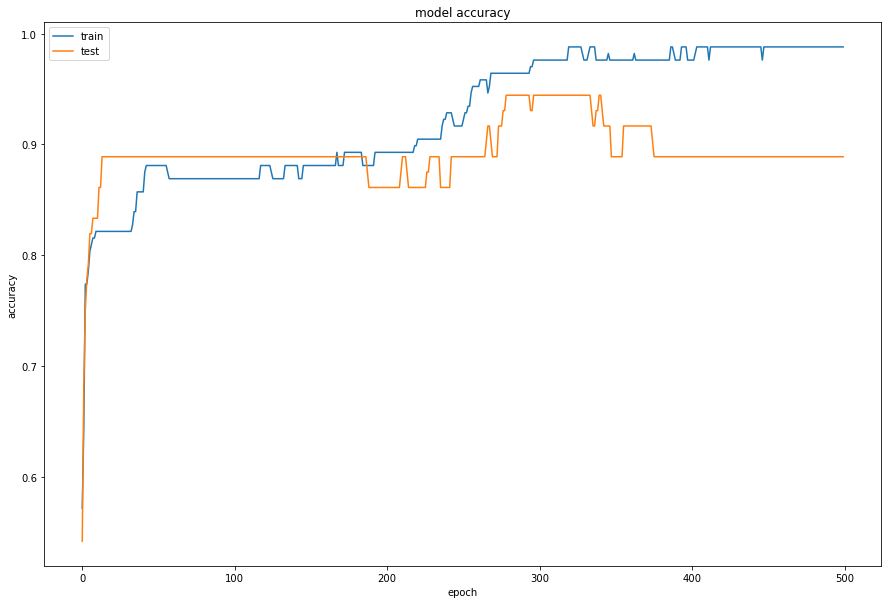

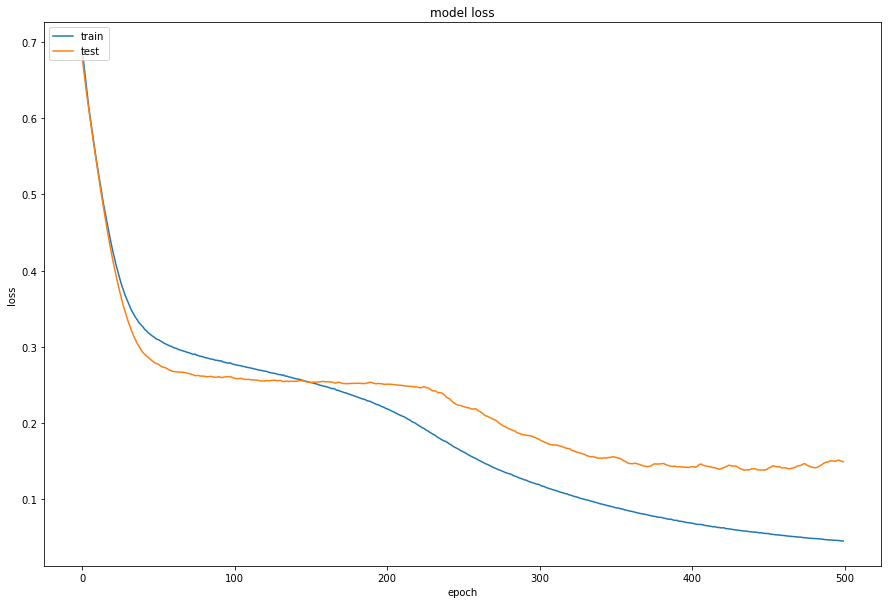

In [6]:
print(history.history.keys())

plt.figure(figsize=(15,10))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
train_metr = model.evaluate(X_train, Y_train, verbose=0)
results = model.evaluate(X_test, Y_test, verbose=0)

print(f'Training {model.metrics_names[0]}: {train_metr[0]} \nTraining {model.metrics_names[1]}: {train_metr[1]}' )
print('='*35)
print(f'Test {model.metrics_names[0]}: {results[0]} \nTest {model.metrics_names[1]}: {results[1]}' )

Training loss: 0.43396140062395716 
Training accuracy: 0.9750000238418579
Test loss: 1.787463903427124 
Test accuracy: 0.8999999761581421


We can see that the model has better performance on the training dataset than the test dataset, one possible sign of __overfitting__.

Let's plot decision boundaries to have a clearer picture

In [28]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

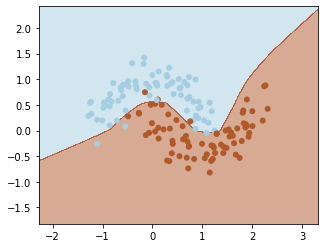

In [30]:
plot_decision_boundary(X, Y, model, steps=1000, cmap='Paired');

A much nicer figure (😉) can be seen [here](https://jamboard.google.com/d/1UmIdOUFZoUcjpPSOq_ryOyAjj5Houy87a--YxZSNi2g/edit?usp=sharing).

## The crucial question

> How do we fight overfit?

## Regularisation

As we have seen above, by an example, a central problem in machine learning is how to make an algorithm that will perform well not just on the training data, but also on new inputs. 
Many strategies used in machine learning are explicitly designed to reduce the test error, possibly at the expense of increased training error. These strategies are known collectively as _regularization_.

### Penalties

One of the most simple way to reduce overfit is to add a penalty term to the cost function.
Euristically, this _penalises_ the high-valued terms, reducing parameters' magnitude (each single node weight) and "simplifying" the model.

$$ J(\beta) = \frac{1}{n} \sum_k \mathcal{L}(\hat{y}^{(k)}, {y}^{(k)}) + \frac{\lambda}{p n} \Vert \beta \Vert_p^p $$

### Dropout

![](https://cdn-images-1.medium.com/max/1000/0*ZRRL-z_7ZxWpuryM.gif)

In a neural network, while training, we set a probability (can be different for each layer) of deleting some of the units of the layer. If $p = 1/2$, at each step we train the network on half of the units.
The guide principle is 
> _a smaller network is less prone to overfit_.

### Data augmentation

Another technique, really used in computer vision is _data augmentation_. 

With this, we mean a slight transformation of each training example (rotation, change of colour, blur, etc.) in order to have much more data and let the deep learning algorithm to have more experience of what an object is.

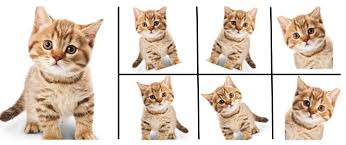

## Application: a guided exercise

### SIGNS Dataset

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


Run the following code to load the dataset.

The following cell loads the dataset.

In [2]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Change the index below and run the cell to visualize some examples in the dataset.

y = 5


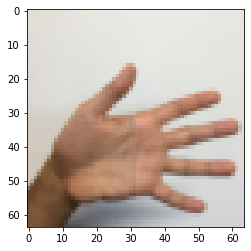

In [3]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

As you can see we have a set of hand signs indicating numbers.

#### Some preprocessing

In [4]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 12288)
Y_train shape: (1080, 6)
X_test shape: (120, 12288)
Y_test shape: (120, 6)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. Please make sure all these shapes make sense to you before continuing.

**Our goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, you are going to build a Keras model that is almost the same as one you have previously built for cat recognition (but now using a softmax output). It is a great occasion to think about how we structure Deep network projects. 

**The model** is *DENSE -> RELU -> DROPOUT(0.2) -> DENSE -> RELU -> DROPOUT(0.2) -> DENSE -> RELU -> DROPOUT(0.5) -> DENSE -> RELU -> DROPOUT(0.5) -> DENSE -> RELU -> DROPOUT(0.5) -> DENSE -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

In [5]:
# model building
n_x = 12288 # 64*64*3
model = Sequential()
model.add(Dense(512, input_dim = n_x, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(6, activation='softmax'))

opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 6,308,582
Trainable params: 6,308,582
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.1)

Train on 756 samples, validate on 324 samples
Epoch 1/100
756/756 [==============================] - 2s 3ms/step - loss: 5.5017 - accuracy: 0.1574 - val_loss: 3.1060 - val_accuracy: 0.1605
Epoch 2/100
756/756 [==============================] - 2s 2ms/step - loss: 3.0523 - accuracy: 0.1931 - val_loss: 3.4632 - val_accuracy: 0.2500
Epoch 3/100
756/756 [==============================] - 2s 2ms/step - loss: 2.6130 - accuracy: 0.3267 - val_loss: 2.6624 - val_accuracy: 0.2284
Epoch 4/100
756/756 [==============================] - 2s 2ms/step - loss: 2.5136 - accuracy: 0.3056 - val_loss: 2.8039 - val_accuracy: 0.3302
Epoch 5/100
756/756 [==============================] - 2s 2ms/step - loss: 2.2448 - accuracy: 0.3558 - val_loss: 2.0851 - val_accuracy: 0.4383
Epoch 6/100
756/756 [==============================] - 2s 2ms/step - loss: 2.0535 - accuracy: 0.4114 - val_loss: 1.9500 - val_accuracy: 0.4444
Epoch 7/100
756/756 [==============================] - 2s 2ms/step - loss: 1.8654 - accuracy: 0.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-a84acd521d5d>", line 1, in <module>
    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.3)
  File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "/opt/conda/lib/python3.7/site-packages/keras/engine/training_arrays.py", line 186, in fit_loop
    ins_batch = slice_arrays(fit_inputs, batch_ids)
  File "/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py", line 555, in slice_arrays
    return [None if x is None else x[start] for x in arrays]
  File "/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py", line 555, in <listcomp>
    return [None if x is None else x[start] for x in arrays]
KeyboardInterrupt

During handling of the 

KeyboardInterrupt: 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


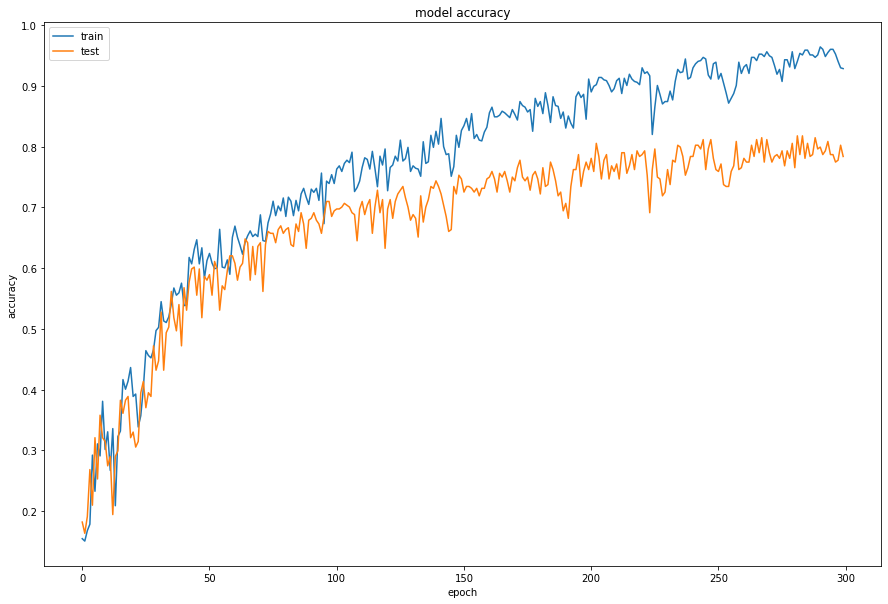

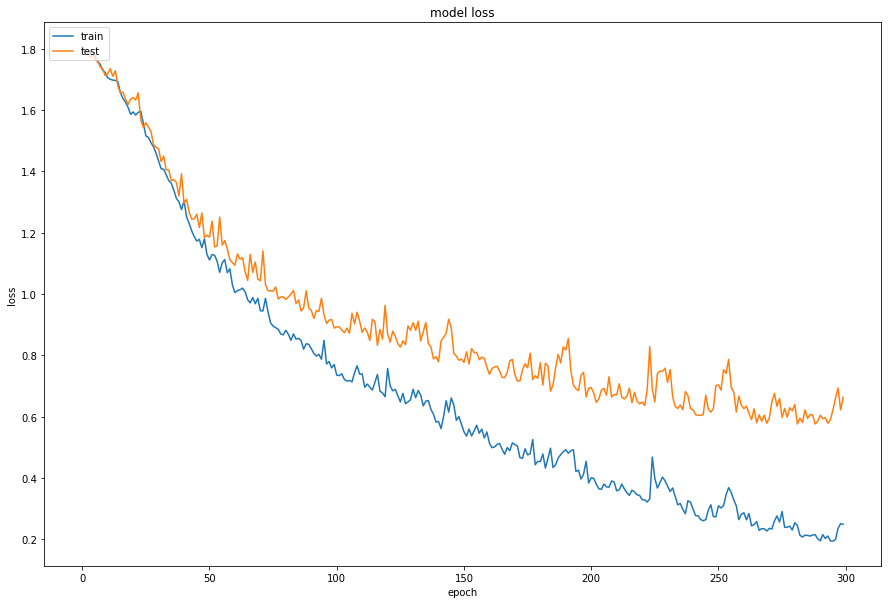

In [7]:
print(history.history.keys())

plt.figure(figsize=(15,10))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
results = model.evaluate(X_test.T, Y_test.T)

print(f'{model.metrics_names[0]}: {results[0]} \n{model.metrics_names[1]}: {results[1]}' )

120/120 [==============================] - 0s 671us/step
loss: 0.6320974985758464 
accuracy: 0.75


The accuracy is not bad, but are we doing deep learning to get better than this. 
Furthermore, notice how the accuracy on the training set is much higher than the one we obtained here.

## What you should remember
- Very deep "plain" networks don't work in practice because they are hard to train due to vanishing gradients/overfit and misprediction problems. 
- Fighting overfit means keeping a bit less attention on training set, to generalise better on new data.

### References  

- A quite nice and not too technical reading is [this medium blog post](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e)
- Francois Chollet's GitHub repository: https://github.com/fchollet/deep-learning-models/blob/master/resnet50.py
